<a href="https://colab.research.google.com/github/anastasiya-h79/statistical_data_analysis/blob/main/comparison_between_tariff_for_a_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Шаг1. Импорт библиотек и данных

In [59]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
calls=pd.read_csv('/content/calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [61]:
data_internet=pd.read_csv('/content/internet.csv')
data_internet.info()
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [62]:
data_internet.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)

In [63]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [64]:
messages=pd.read_csv('/content/messages.csv')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [65]:
tariffs=pd.read_csv('/content/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [66]:
users=pd.read_csv('/content/users.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [67]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

##**Выводы**

1. В датасетах calls, users, messages, data_internet нужно поменять тип данных в столбцах с датами в тип datetime.

2. В датасетах calls ('duration'), data_internet ('mb_used') нужно привести данные в int-тип.

3. В tariffs есть пропуски

4. В датасете users ('churn_date') — данные о прекращении использования тарифа: если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

#Шаг2. Предобработка данных

Приведение данных к нужным типам

In [68]:
#Напишем функцию для приведения столбцов к формату datetime
def to_dt(data, col):
  data[col] = pd.to_datetime(data[col], format='%Y-%m-%d')

In [69]:
#Приводим данные в cоответствующих столбцах к формату даты
to_dt(calls, 'call_date')
to_dt(users, 'reg_date')
to_dt(users, 'churn_date')
to_dt(data_internet, 'session_date')
to_dt(messages, 'message_date')


In [70]:
#Напишем функцию, чтобы округлить значения столбцов
def ceil_int(data, col):
  data[col] = np.ceil(data[col]).astype('int')

In [71]:
ceil_int(calls, 'duration')
ceil_int(data_internet,'mb_used')

In [72]:
calls.id = calls.id.astype('int')

In [73]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


In [74]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [75]:
data_internet.info()
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [76]:
#Напишем функцию, извлекающую месяц из даты и добавляющую столбец с номером месяца
def month(data, col):
    data['month'] = data[col].dt.month

In [77]:
month(calls, 'call_date')
month(messages, 'message_date')
month(data_internet, 'session_date')

Посчитаем количество сделанных звонков и израсходованных минут разговора, количество сообщений и интернет-трафика по месяцам для каждого пользователя


In [78]:
# Объединим таблицы users и calls, чтобы посчитать кол-во звонков на пользователя и длительность звонков на пользователя по месяцам
users_calls = users.merge(calls, on='user_id')
users_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10000,2018-07-25,0,7
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10001,2018-08-17,0,8
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10002,2018-06-11,3,6
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10003,2018-09-21,14,9
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10004,2018-12-15,6,12


In [79]:
#Посчитаем количество звонков на пользователя по месяцам и с длительностью звонков на пользователя по месяцам
calls_per_month = calls.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']})
calls_per_month.columns = ['calls', 'minutes']
calls_per_month.tail(25)

calls  minutes
user_id month                
1495    11       129      954
        12       155     1031
1496    1          7       48
        2         77      594
        3         79      557
        4         67      521
        5         63      484
        6         74      555
        7         73      582
        8         88      527
        9         68      486
        10        72      450
        11        80      662
        12        80      518
1497    10        66      490
        11        64      371
        12        71      545
1498    7         23      175
        8         57      400
        9         59      471
        10        41      247
1499    9          9       70
        10        68      449
        11        74      612
        12        69      492

In [80]:
#Кол-во сообщений в месяц на каждого пользователя
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'})
messages_per_month.columns = ['messages']
messages_per_month.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

In [81]:
#Объем израсходованного трафика по месяцам на пользователя
mb_used_per_month = data_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
mb_used_per_month.columns = ['mb_used']
mb_used_per_month.head(10)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

Посчитаем помесячнаую выручку с каждого пользователя (суммарное количество звонков, сообщений и интернет-трафика вычесть бесплатный лимит; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).


In [82]:
#Удалим избыточные данные в users
users = users.drop(['first_name', 'last_name'], axis = 1)

In [83]:
#Переименуем колонку 'tariff' в users на 'tariff_name' для последующего объединения тамблиц
users = users.rename(columns={'tariff': 'tariff_name'})

In [84]:
#Объединим users и tariffs по столбцу 'tariff_name'
users.set_axis(['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name'], axis = 'columns', inplace = True)
users_tariffs = tariffs.merge(users, on='tariff_name', how='left')
users_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,reg_date
0,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01
1,50,15360,500,550,200,3,3,smart,1002,59,NaT,Стерлитамак,2018-06-17
2,50,15360,500,550,200,3,3,smart,1005,67,NaT,Набережные Челны,2018-01-25
3,50,15360,500,550,200,3,3,smart,1006,21,NaT,Ульяновск,2018-02-26
4,50,15360,500,550,200,3,3,smart,1007,65,NaT,Москва,2018-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1000,30720,3000,1950,150,1,1,ultra,1476,50,NaT,Москва,2018-04-30
496,1000,30720,3000,1950,150,1,1,ultra,1485,34,NaT,Киров,2018-12-29
497,1000,30720,3000,1950,150,1,1,ultra,1491,56,NaT,Челябинск,2018-04-25
498,1000,30720,3000,1950,150,1,1,ultra,1493,71,NaT,Красноярск,2018-11-24


In [85]:
#Сохраним в переменные пользователей двух тарифных планов
user_tariff_smart = users_tariffs.query('tariff_name == "smart"')
user_tariff_ultra = users_tariffs.query('tariff_name == "ultra"')

print('Пользователей тарифа Smart:', len(user_tariff_smart))
print('Пользователей тарифа Ultra:', len(user_tariff_ultra))

Пользователей тарифа Smart: 351
Пользователей тарифа Ultra: 149


In [86]:
#Объединим таблицы users+tariffs с сalls
users_tariffs_calls = users_tariffs.merge(calls, on='user_id', how='left')  
users_tariffs_calls

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,reg_date,id,call_date,duration,month
0,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01,10010.0,2018-11-13,11.0,11.0
1,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01,10011.0,2018-12-14,16.0,12.0
2,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01,10012.0,2018-11-20,3.0,11.0
3,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01,10013.0,2018-12-27,8.0,12.0
4,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,2018-11-01,10014.0,2018-11-19,20.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaT,Иркутск,2018-08-28,1495560.0,2018-09-24,13.0,9.0
202611,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaT,Иркутск,2018-08-28,1495561.0,2018-12-05,10.0,12.0
202612,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaT,Иркутск,2018-08-28,1495562.0,2018-10-05,1.0,10.0
202613,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaT,Иркутск,2018-08-28,1495563.0,2018-09-18,1.0,9.0


In [88]:
#Добавим значения количества звонков и минут на пользователя с месяц
table_users_tariffs_calls = calls_per_month
for df in [users_tariffs_calls]:
    table_users_tariffs_calls = table_users_tariffs_calls.merge(df, on = ['user_id', 'month'], how = 'left')
    
table_users_tariffs_calls.head()

,user_id,month,calls,minutes,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,age,churn_date,city,reg_date,id,call_date,duration
0,1000,5,22,159,1000,30720,3000,1950,150,1,1,ultra,52,NaT,Краснодар,2018-05-25,100011.0,2018-05-28,19.0
1,1000,5,22,159,1000,30720,3000,1950,150,1,1,ultra,52,NaT,Краснодар,2018-05-25,100038.0,2018-05-25,0.0
2,1000,5,22,159,1000,30720,3000,1950,150,1,1,ultra,52,NaT,Краснодар,2018-05-25,100056.0,2018-05-30,9.0
3,1000,5,22,159,1000,30720,3000,1950,150,1,1,ultra,52,NaT,Краснодар,2018-05-25,100078.0,2018-05-26,11.0
4,1000,5,22,159,1000,30720,3000,1950,150,1,1,ultra,52,NaT,Краснодар,2018-05-25,1000113.0,2018-05-26,7.0


In [89]:
#Сделаем сводник, саггрегировав по количеству минут и длительности звонков
pivot_call = table_users_tariffs_calls.pivot_table(
    index = ['user_id', 'age', 'city', 'month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], 
    values = ['duration'], 
    aggfunc = ['count', 'sum'])
pivot_call.tail(15)

count  \
                                                                                                                                                             duration   
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1496    36  Вологда     9     smart       550             500              50                3               200        3              15360                       68   
                        10    smart       550             500              50                3               200        3              15360                       72   
                        11    smart       550             500              50                3               200        3              15360                       80   
                        12    smart       550             500              50                3               200        3              15360                       80   
1497    32  Челябинск   10    smart       550             500              50                3               200        3              15360                       66   
                        11    smart       550             500              50                3               200        3              15360                       64   
                        12    smart       550             500              50                3               200        3              15360                       71   
1498    68  Владикавказ 7     smart       550             500              50                3               200        3              15360                       23   
                        8     smart       550             500              50                3               200        3              15360                       57   
                        9     smart       550             500              50                3               200        3              15360                       59   
                        10    smart       550             500              50                3               200        3              15360                       41   
1499    35  Пермь       9     smart       550             500              50                3               200        3              15360                        9   
                        10    smart       550             500              50                3               200        3              15360                       68   
                        11    smart       550             500              50                3               200        3              15360                       74   
                        12    smart       550             500              50                3               200        3              15360                       69   

                                                                                                                                                                  sum  
                                                                                                                                                             duration  
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included           
1496    36  Вологда     9     smart       550             500              50                3               200        3              15360                    486.0  
                        10    smart       550             500              50                3               200        3              15360                    450.0  
                        11    smart       550             500              50                3               200        3              15360                    662.0  
                        12    smart       550             500              50                3               

In [90]:
#Добавим таблицу с группировкой сообщений по пользователям-месяцам
pivot_call_messages = pivot_call.join(messages_per_month, how='outer' )
pivot_call_messages.tail(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  sort=sort,


(count, duration)  \
user_id month age city        tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included                      
1498    10    68  Владикавказ smart       550             500              50                3               200        3              15360                               41.0   
1499    9     35  Пермь       smart       550             500              50                3               200        3              15360                                9.0   
        10    35  Пермь       smart       550             500              50                3               200        3              15360                               68.0   
        11    35  Пермь       smart       550             500              50                3               200        3              15360                               74.0   
        12    35  Пермь       smart       550             500              50                3               200        3              15360                               69.0   

                                                                                                                                                              (sum, duration)  \
user_id month age city        tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included                    
1498    10    68  Владикавказ smart       550             500              50                3               200        3              15360                            247.0   
1499    9     35  Пермь       smart       550             500              50                3               200        3              15360                             70.0   
        10    35  Пермь       smart       550             500              50                3               200        3              15360                            449.0   
        11    35  Пермь       smart       550             500              50                3               200        3              15360                            612.0   
        12    35  Пермь       smart       550             500              50                3               200        3              15360                            492.0   

                                                                                                                                                              messages  
user_id month age city        tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1498    10    68  Владикавказ smart       550             500              50                3               200        3              15360                      42.0  
1499    9     35  Пермь       smart       550             500              50                3               200        3              15360                      11.0  
        10    35  Пермь       smart       550             500              50                3               200        3              15360                      48.0  
        11    35  Пермь       smart       550             500              50                3               200        3              15360                      59.0  
        12    35  Пермь       smart       550             500              50                3               200        3              15360                      66.0

In [91]:
#Соединим сводник с данными по интернет-трафику
full_table = pivot_call_messages.join(mb_used_per_month, how='outer')
full_table.columns = ['duration_count', 'duration_sum', 'messages', 'mb_used']
full_table.reset_index(inplace=True)
full_table.tail(10)

,user_id,month,age,city,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,rub_per_minute,mb_per_month_included,duration_count,duration_sum,messages,mb_used
3204,1497,11,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,64.0,371.0,14.0,14174.0
3205,1497,12,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,71.0,545.0,17.0,19940.0
3206,1498,7,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,23.0,175.0,20.0,7486.0
3207,1498,8,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,57.0,400.0,62.0,24270.0
3208,1498,9,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,59.0,471.0,44.0,22166.0
3209,1498,10,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,41.0,247.0,42.0,20604.0
3210,1499,9,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,9.0,70.0,11.0,1848.0
3211,1499,10,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,68.0,449.0,48.0,17809.0
3212,1499,11,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,74.0,612.0,59.0,17984.0
3213,1499,12,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,3.0,15360.0,69.0,492.0,66.0,13077.0


In [92]:
#Посмотрим на пропуски
full_table.isna().sum()

user_id                    0
month                      0
age                       40
city                      40
tariff_name               40
rub_monthly_fee           40
minutes_included          40
messages_included         40
rub_per_message           40
rub_per_gb                40
rub_per_minute            40
mb_per_month_included     40
duration_count            40
duration_sum              40
messages                 497
mb_used                   11
dtype: int64

In [93]:
#Заменим пропуски нулями
full_table = full_table.fillna(0)

Посчитаем помесячнаую выручку с каждого пользователя

In [94]:
#Пересчитаем число использованных мегабайтов в гигабайты и округлим в бОльшую сторону 
full_table['gb_used'] = np.ceil(full_table['mb_used'] / 1024)
full_table['gb_per_month_included'] = np.ceil(full_table['mb_per_month_included'] / 1024)

In [95]:
#Добавим столбцы с выручкой за звонки, сообщения, гб
full_table['calls_revenue'] = ((full_table['duration_sum'] - full_table['minutes_included']) * full_table['rub_per_minute'])
full_table['messages_revenue'] = ((full_table['messages'] - full_table['messages_included']) * full_table['rub_per_message'])
full_table['gb_revenue'] = ((full_table['gb_used'] - full_table['gb_per_month_included']) * full_table['rub_per_gb'])
full_table.tail(10)

,user_id,month,age,city,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,...,mb_per_month_included,duration_count,duration_sum,messages,mb_used,gb_used,gb_per_month_included,calls_revenue,messages_revenue,gb_revenue
3204,1497,11,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,64.0,371.0,14.0,14174.0,14.0,15.0,-387.0,-108.0,-200.0
3205,1497,12,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,71.0,545.0,17.0,19940.0,20.0,15.0,135.0,-99.0,1000.0
3206,1498,7,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,23.0,175.0,20.0,7486.0,8.0,15.0,-975.0,-90.0,-1400.0
3207,1498,8,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,57.0,400.0,62.0,24270.0,24.0,15.0,-300.0,36.0,1800.0
3208,1498,9,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,59.0,471.0,44.0,22166.0,22.0,15.0,-87.0,-18.0,1400.0
3209,1498,10,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,41.0,247.0,42.0,20604.0,21.0,15.0,-759.0,-24.0,1200.0
3210,1499,9,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,9.0,70.0,11.0,1848.0,2.0,15.0,-1290.0,-117.0,-2600.0
3211,1499,10,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,68.0,449.0,48.0,17809.0,18.0,15.0,-153.0,-6.0,600.0
3212,1499,11,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,74.0,612.0,59.0,17984.0,18.0,15.0,336.0,27.0,600.0
3213,1499,12,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,15360.0,69.0,492.0,66.0,13077.0,13.0,15.0,-24.0,48.0,-400.0


In [96]:
#В столбцах с прибылью заменим отрицательные значения на 0. И заменим образовавшиеся пропуски на 0
full_table['messages_revenue'] = full_table['messages_revenue'].clip(lower = 0)
full_table['calls_revenue'] = full_table['calls_revenue'].clip(lower = 0)
full_table['gb_revenue'] = full_table['gb_revenue'].clip(lower = 0)

In [97]:
#Суммируем прибыль, полученную за тарифы и сверх тарифов. Запишем ее в столбец 'revenue'
full_table['revenue'] = full_table['rub_monthly_fee'] + full_table['calls_revenue'] + full_table['messages_revenue'] + full_table['gb_revenue']
full_table.tail(10)

,user_id,month,age,city,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,...,duration_count,duration_sum,messages,mb_used,gb_used,gb_per_month_included,calls_revenue,messages_revenue,gb_revenue,revenue
3204,1497,11,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,...,64.0,371.0,14.0,14174.0,14.0,15.0,0.0,0.0,0.0,550.0
3205,1497,12,32.0,Челябинск,smart,550.0,500.0,50.0,3.0,200.0,...,71.0,545.0,17.0,19940.0,20.0,15.0,135.0,0.0,1000.0,1685.0
3206,1498,7,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,23.0,175.0,20.0,7486.0,8.0,15.0,0.0,0.0,0.0,550.0
3207,1498,8,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,57.0,400.0,62.0,24270.0,24.0,15.0,0.0,36.0,1800.0,2386.0
3208,1498,9,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,59.0,471.0,44.0,22166.0,22.0,15.0,0.0,0.0,1400.0,1950.0
3209,1498,10,68.0,Владикавказ,smart,550.0,500.0,50.0,3.0,200.0,...,41.0,247.0,42.0,20604.0,21.0,15.0,0.0,0.0,1200.0,1750.0
3210,1499,9,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,9.0,70.0,11.0,1848.0,2.0,15.0,0.0,0.0,0.0,550.0
3211,1499,10,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,68.0,449.0,48.0,17809.0,18.0,15.0,0.0,0.0,600.0,1150.0
3212,1499,11,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,74.0,612.0,59.0,17984.0,18.0,15.0,336.0,27.0,600.0,1513.0
3213,1499,12,35.0,Пермь,smart,550.0,500.0,50.0,3.0,200.0,...,69.0,492.0,66.0,13077.0,13.0,15.0,0.0,48.0,0.0,598.0


In [98]:
#Сохраним общую прибыль по тарифам
total_revenue = full_table.pivot_table(
    index = ['tariff_name'], 
    values = ['calls_revenue', 'messages_revenue', 'gb_revenue', 'revenue'],  
    aggfunc=['sum'])

total_revenue

sum                                       
            calls_revenue gb_revenue messages_revenue    revenue
tariff_name                                                     
0                     0.0        0.0              0.0        0.0
smart            278217.0  1340400.0          38784.0  2880051.0
ultra                 0.0   115950.0              0.0  1970400.0

##**Выводы**

1. Тариф Smart приносит более чем на 30% больше, чем Ultra (общая прибыль)

2. Доход сверх тарифа у Smart выше по всем категориям: звонкам, Гб, сообщениям

3. В обоих тарифах самым прибильным сегментом является интернет


#Шаг3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


In [99]:
#Создадим 2 таблицы с даннами по тарифам Smart и Ultra
table_smart = full_table[(full_table['tariff_name'] == 'smart')]
table_ultra = full_table[(full_table['tariff_name'] == 'ultra')]


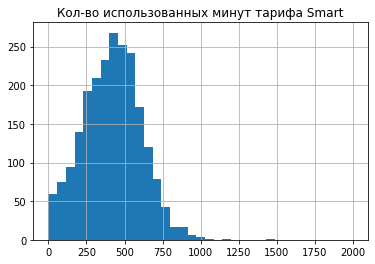

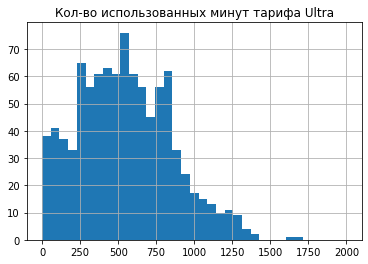

In [102]:
#Построим гистограммы с количеством минут для обоих тарифов
table_smart['duration_sum'].hist(bins=35, range = (0, 2000))
plt.title('Кол-во использованных минут тарифа Smart')
plt.show()

table_ultra['duration_sum'].hist(bins=35, range = (0, 2000))
plt.title('Кол-во использованных минут тарифа Ultra')
plt.show()

Smart. БОльшая часть пользователей тратит лимитное количество минут - 250 - 500 минут. Довольно много доходят до 550 - 750 минут. Совсем небольшая часть тратят около  1000 минут.

Ultra. Среди пользователей данного тарифа есть довольно приличная часть, которая не использует сотовую связь или тратит не больше 250 минут. Пик количества потраченных минут приходится на 500-850. После него и примерно до 1350 минут идет резкий спад.

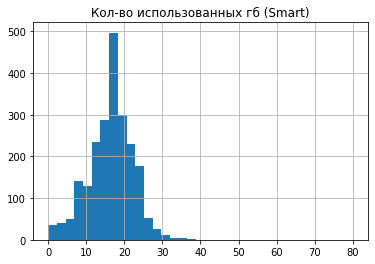

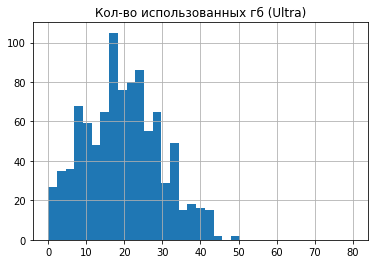

In [107]:
#Построим гистограммы с количеством потраченных гб для обоих тарифов
table_smart['gb_used'].hist(bins=35, range = (0, 80))
plt.title('Кол-во использованных гб (Smart)')
plt.show()

table_ultra['gb_used'].hist(bins=35, range = (0, 80))
plt.title('Кол-во использованных гб (Ultra)')
plt.show()

Smart. Небольшая часть пользователей не использует Интернет, или им хватает не более 8 гб. Пик находится на 15-25 гб, хвост приближается к нулю после 40 гб.

Ultra. БОльшая часть пользователей тратит от 12 до почти 30 гб. Но есть и такие, которые не пользуются Интернетом или тратят не больше 10 гб. Еще один небольшой сегмент - те, кто используют от 30 до 45 гб

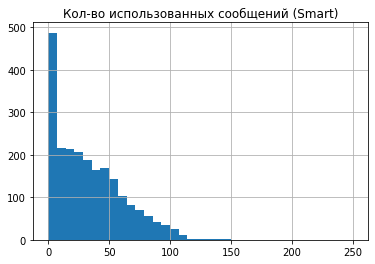

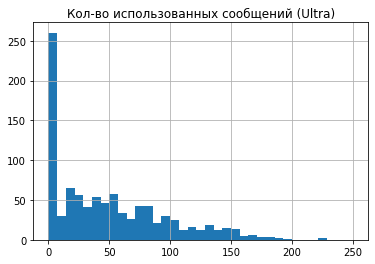

In [108]:
#Построим гистограммы с количеством потраченных минут для обоих тарифов
table_smart['messages'].hist(bins=35, range = (0, 250))
plt.title('Кол-во использованных сообщений (Smart)')
plt.show()

table_ultra['messages'].hist(bins=35, range = (0, 250))
plt.title('Кол-во использованных сообщений (Ultra)')
plt.show()

Smart. Многие пользователей не отправляют сообщений вообще, либо отправляют не более 5. Большая часть пользователей укладывается в лимит 50 сообщений, но довольно ощутимая часть отправляет до 100. Хвост тянется примерно до 150 сообщений.

Ultra. Многие пользователей не отправляют сообщений вообще, либо отправляют не более 5. Большая часть 20-100 сообщений, хвост приближается к 0 около 180 сообщений.

In [111]:
#Посчитаем среднее, дисперсию и стандартное отклонение по каждому тарифу
variance = full_table.pivot_table(
    index = ['tariff_name'], 
    values = ['duration_sum', 'messages', 'gb_used'], 
    aggfunc=['mean', 'var', 'std'])

variance.round(0)

mean                           var                   \
            duration_sum gb_used messages duration_sum gb_used messages   
tariff_name                                                               
0                    0.0    19.0     54.0          0.0    70.0   4157.0   
smart              419.0    16.0     33.0      35844.0    33.0    799.0   
ultra              545.0    20.0     49.0      94203.0    98.0   2199.0   

                     std                   
            duration_sum gb_used messages  
tariff_name                                
0                    0.0     8.0     64.0  
smart              189.0     6.0     28.0  
ultra              307.0    10.0     47.0

##**Выводы**

1. Пользователи Smart часто выходят за лимиты тарифа. Это касается и кол-ва минут, и интернет-трафика, и сообщений.
Пользователи Ultra практически не превышают лимитов, кроме интернет-трафика.

2. БОльшая часть пользователи обоих тарифов мало отправляют сообщения, или вообще не задействуют эту услугу.


3. Пользователи обоих тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.



#Шаг4. Проверка гипотез

1.	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

2.	средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:
1.	как вы формулировали нулевую и альтернативную гипотезы;

2.	какой критерий использовали для проверки гипотез и почему.


Гипотеза 1

H₀: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.

H₁: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [114]:
smart = table_smart['revenue']
ultra = table_ultra['revenue']

print('cреднее значение Smart: ',pd.Series(smart).mean())
print('cреднее значение Ultra: ',pd.Series(ultra).mean())
alpha = 0.05

results = st.ttest_ind(smart, ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Среднее значение двух тарифов различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее значение Smart:  1295.5695006747637
cреднее значение Ultra:  2071.9242902208202
p-значение: 3.824107073278515e-153
Отвергаем нулевую гипотезу. Среднее значение двух тарифов различается


Гипотеза 2

H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

H₁: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [116]:
#Сохраним в moscow_users список пользователей из Москвы, а в other список пользователей из других регионов
moscow_users = full_table[(full_table['city'] == 'Москва')]
other_users = full_table[(full_table['city'] != 'Москва')]


In [117]:
moscow = moscow_users['revenue']
other = other_users['revenue']

print('Выручка по Москве: ',pd.Series(moscow).mean())
print('Выручка с других регионов: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка по Москве не отличается от других регионов")

Выручка по Москве:  1550.150819672131
Выручка с других регионов:  1499.5618279569892
p-значение: 0.16747511851088775
Не получилось отвергнуть нулевую гипотезу. Средняя выручка по Москве не отличается от других регионов


Проверим еще пару гипотез: 

1. средняя выручка Smart пользователей из Москвы не отличается от выручки пользователей из других регионов.

2. средняя выручка тарифа Ultra пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [121]:
moscow_users_smart = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'smart')]
other_users_smart = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'smart')]

moscow = moscow_users_smart['revenue']
other = other_users_smart['revenue']

print('cреднее до: ',pd.Series(moscow).mean())
print('cреднее после: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(moscow, other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Cредняя выручка Smart пользователей из Москвы отличается от выручки пользователей из других регионов")
else:
    print("Cредняя выручка Smart пользователей из Москвы не отличается от выручки пользователей из других регионов")

cреднее до:  1245.0569948186528
cреднее после:  1306.1834512792598
p-значение: 0.18401298176931022
Cредняя выручка Smart пользователей из Москвы не отличается от выручки пользователей из других регионов


In [122]:
moscow_users_ultra = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'ultra')]
other_users_ultra = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'ultra')]

moscow = moscow_users_ultra['revenue']
other = other_users_ultra['revenue']

print('Выручка по Москве тарифа Ultra: ',pd.Series(moscow).mean())
print('Выручка с других регионов тарифа Ultra: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(moscow, other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Cредняя выручка Ultra пользователей из Москвы отличается от выручки пользователей из других регионов")
else:
    print("Cредняя выручка Ultra пользователей из Москвы не отличается от выручки пользователей из других регионов")

Выручка по Москве тарифа Ultra:  2075.8928571428573
Выручка с других регионов тарифа Ultra:  2070.7015130674004
p-значение: 0.8590006760225506
Cредняя выручка Ultra пользователей из Москвы не отличается от выручки пользователей из других регионов


#**Общий вывод**

1. Общая прибыль выше у тарифа Smart. Больше дополнительного дохода приносит также тариф Smart.

2. Самой прибыльной услугой является интернет.

3. Пользователи Smart не укладываются в лимиты тарифа. Это касается и кол-ва минут, и интернет-трафика, и сообщений. Пользователи Ultra практически не превышают лимитов, кроме интернет-трафика.

4. Пользователи обоих тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.

5. БОльшая часть пользователи обоих тарифов мало отправляют сообщения, или вообще не задействуют эту услугу.

6. Пользователи Ultra зачастую не используют весь лимит звонков и сообщений.

7. Неоходимо отметить, что еесмотря на то, что Smart является более прибыльным, среднняя выручка больше у Ultra.

8. Разница в средней выручке пользователей из Москвы и др. регионов есть, но незначительна.
Если сравнить среднюю выручку по тарифам пользователей из Москвы с польователями др. регионов, она также будет почти незаметной.

 

